<a href="https://colab.research.google.com/github/auliaacahyaa/Machine-Learning/blob/main/Week_3_09_Aulia_Cahya_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Aulia Cahya Briliana

No. Absen : 09

NIM : 2141720092

Kelas : 3D

Tugas 1: Multiple Linear Regression
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

# **Langkah Awal**

In [ ]:
# Mengimpor library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures #preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **NO. 1**

Dari hasil import data, dapat diidentifikasi variabel bebas dan variabel target sebagai berikut :    

**Variabel Bebas** -> data atau atribut yang digunakan sebagai input atau faktor-faktor yang digunakan oleh model machine learning untuk melakukan prediksi atau analisis

1. age
2. sex
3. bmi
4. children
5. smoker
6. region


**Variabel Target** -> variabel yang ingin diprediksi atau dianalisis oleh model machine learning

1. charges

# **NO.2**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


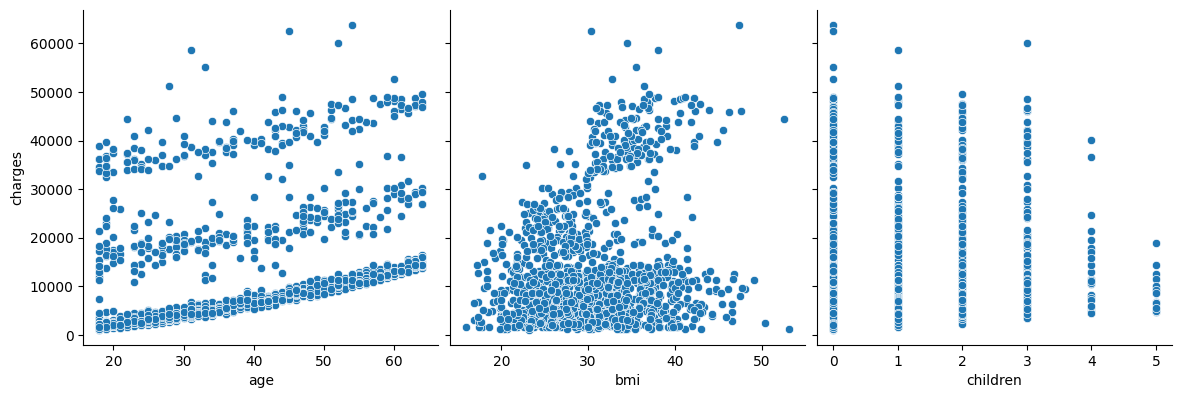

In [ ]:
# operasi visualisasi
sns.pairplot(data, x_vars=['age', 'bmi','children'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

<ipython-input-23-7d3c3461879a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)


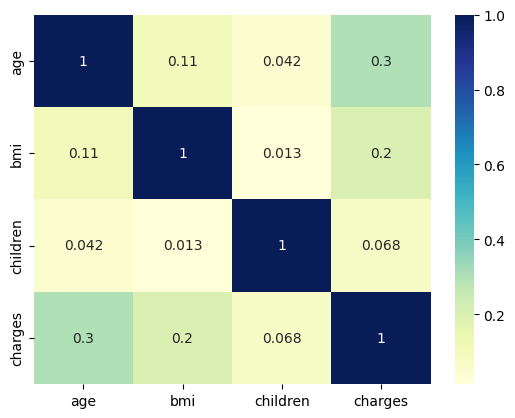

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
X = data['age']
y = data['charges']

X.head()

0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64

In [ ]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [ ]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

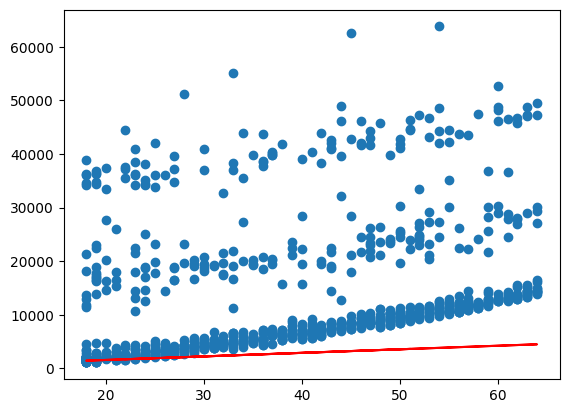

Jumlah Data Latih:  936
Jumlah Data Uji:  402


In [ ]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

print("Jumlah Data Latih: ", len(X_train))
print("Jumlah Data Uji: ", len(X_test))

# **NO. 3**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
X = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([10, 20, 30, 40, 50])
sc_X = StandardScaler()
sc_y = StandardScaler()
X = X.to_numpy().reshape(-1, 1)
y = y.to_numpy().reshape(-1, 1)
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

# **NO. 4**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

# **NO. 5**

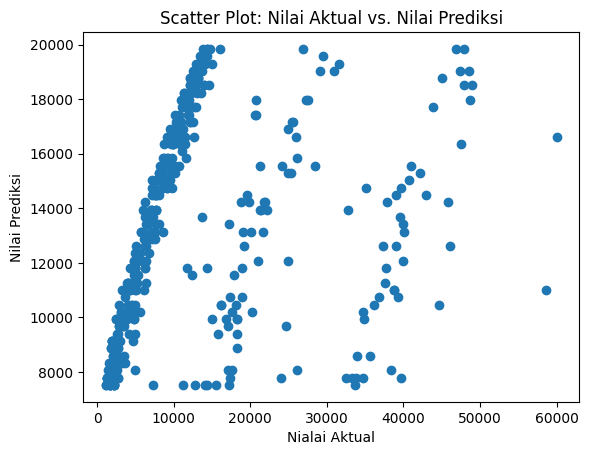

In [ ]:
#Training Model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

plt.scatter(y_test, y_test_pred)
plt.xlabel("Nialai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Scatter Plot: Nilai Aktual vs. Nilai Prediksi")
plt.show()

# **NO. 6**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# hitung nilai R-squad
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_test_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_test_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_test, y_test_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 9031.799151222724
MSE: 134798778.0695984
RMSE: 11610.287596334485
R-squared: 0.07161898944046363
